In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-sentiment-analysis-hatred-speech/train.csv
/kaggle/input/twitter-sentiment-analysis-hatred-speech/test.csv


In [2]:
import seaborn as sns #for visualization
import matplotlib.pyplot as plt #for visualization
#from jupyterthemes import jtplot #for styling matplotlib
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
train_data = pd.read_csv('../input/twitter-sentiment-analysis-hatred-speech/train.csv')
test_data = pd.read_csv('../input/twitter-sentiment-analysis-hatred-speech/test.csv')

In [4]:
#jtplot.style(theme = 'monokai', context = 'notebook', grid = False, ticks = False)

In [5]:
train_data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


0 label = Positive Tweet

1 label = Negative Tweet

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [7]:
train_data.shape

(31962, 3)

In [8]:
train_data['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [9]:
train_data = train_data.drop('id', axis = 1)

In [10]:
train_data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


Exploring the dataset

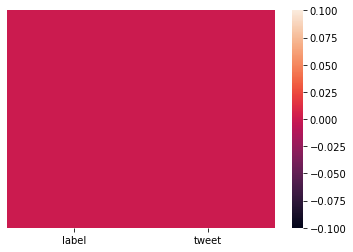

In [11]:
sns.heatmap(train_data.isnull(), yticklabels = False)
plt.show()

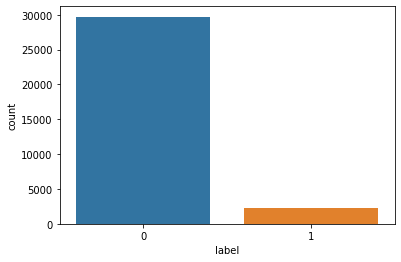

In [12]:
sns.countplot(x = train_data['label'])
plt.show()

In [13]:
len(train_data)

31962

In [14]:
length = list()
for i in range(len(train_data)):
    length.append(len(train_data.iloc[i,1]))

In [15]:
train_data['length'] = length

In [16]:
train_data.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


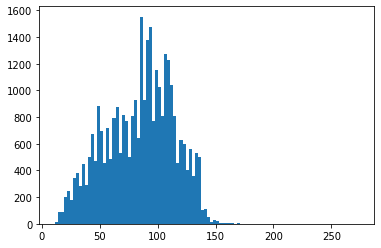

In [17]:
plt.hist(train_data['length'], bins = 100)
plt.show()

In [18]:
train_data.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


Shortest Tweet -

In [19]:
train_data[train_data['length'] == min(train_data['length'])]['tweet'].iloc[0]

'i love you '

Longest Tweet - 

In [20]:
train_data[train_data['length'] == max(train_data['length'])]['tweet'].iloc[0]

' @user lmfao pathetic #soit   #growup #funny #noonethere #iknowwhoitis ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82â\x80¦'

Average Length Tweet - 

In [21]:
train_data[train_data['length'] == 84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

In [22]:
positive = train_data[train_data['label'] == 0]

In [23]:
positive.describe()

,label,length
count,29720.0,29720.000000
mean,0.0,84.328634
std,0.0,29.566484
min,0.0,11.000000
25%,0.0,62.000000
50%,0.0,88.000000
75%,0.0,107.000000
max,0.0,274.000000


In [24]:
negative = train_data[train_data['label'] == 1]

In [25]:
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


In [26]:
negative.describe()

,label,length
count,2242.0,2242.000000
mean,1.0,90.187779
std,0.0,27.375502
min,1.0,12.000000
25%,1.0,69.000000
50%,1.0,96.000000
75%,1.0,111.000000
max,1.0,152.000000


In [27]:
from wordcloud import WordCloud

In [28]:
sentences = train_data['tweet'].tolist()

In [29]:
combined_sentences = " ".join(sentences)

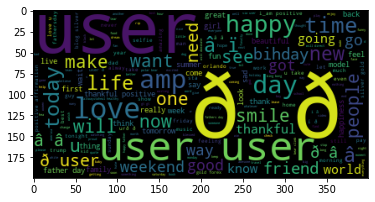

In [30]:
plt.imshow(WordCloud().generate(combined_sentences))
plt.show()

In [31]:
negative_sentences = negative['tweet'].tolist()

In [32]:
combined_negative_sentences = " ".join(negative_sentences)

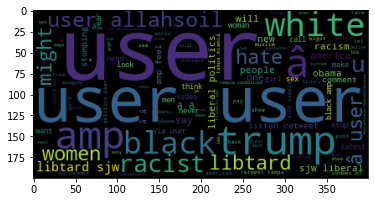

In [33]:
plt.imshow(WordCloud().generate(combined_negative_sentences))
plt.show()

Cleaning the data

In [34]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
import nltk

In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
from nltk.corpus import stopwords

In [38]:
st = stopwords.words('english')
st.append("and")

In [39]:
Test = "Goblin and Ninja FoR the win!!"
test_punc_removed = []
for char in Test:
    if char not in string.punctuation:
        test_punc_removed.append(char)
test_punc_removed = ''.join(test_punc_removed)        

In [40]:
test_punc_removed

'Goblin and Ninja FoR the win'

In [41]:
test_punc_st_removed = []
for char in test_punc_removed.split():
    if char.lower() not in st:
        test_punc_st_removed.append(char)
test_punc_st_removed = " ".join(test_punc_st_removed)  

In [42]:
test_punc_st_removed

'Goblin Ninja win'

Tokenization

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
sample_data = ["This is my first paper", "This is the second document", "here is the third thi one"]

In [45]:
vectorizer = CountVectorizer()

In [46]:
X = vectorizer.fit_transform(sample_data)

In [47]:
vectorizer.get_feature_names_out()

array(['document', 'first', 'here', 'is', 'my', 'one', 'paper', 'second',
       'the', 'thi', 'third', 'this'], dtype=object)

In [48]:
X.toarray()

array([[0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1],
       [0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0]])

Creating a pipeline which removes punctuation, stopwords and peforms tokenization

In [49]:
def message_cleaning(message):
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed = ''.join(test_punc_removed)
    test_punc_st_removed = []
    for char in test_punc_removed.split():
        if char.lower() not in st:
            test_punc_st_removed.append(char)
    test_punc_st_removed = " ".join(test_punc_st_removed)  
    return test_punc_st_removed

In [50]:
message_cleaning("Goblin and Ninja fOR thE win!!")

'Goblin Ninja win'

In [51]:
train_data_clean = train_data['tweet'].apply(message_cleaning)

In [52]:
train_data['tweet'][5]

'[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  '

In [53]:
train_data_clean[5]

'22 huge fan fare big talking leave chaos pay disputes get allshowandnogo'

In [54]:
data = train_data_clean.tolist()

In [55]:
tweets_countvectorizer = CountVectorizer().fit_transform(data).toarray()

In [56]:
tweets_countvectorizer.shape

(31962, 43671)

In [57]:
X = tweets_countvectorizer
y = train_data['label']

Using Naive Bayes to classify

In [58]:
X.shape

(31962, 43671)

In [59]:
y.shape

(31962,)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [62]:
from sklearn.naive_bayes import MultinomialNB #for discrete values

In [63]:
NB_classifier = MultinomialNB()

In [64]:
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [65]:
y_pred = NB_classifier.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [67]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[5792,  162],
       [ 195,  244]])

<AxesSubplot:>

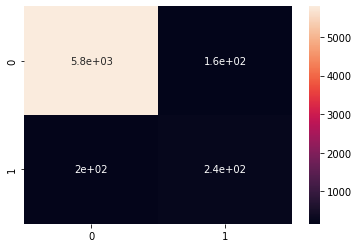

In [68]:
sns.heatmap(cm, annot = True)

In [69]:
ac = accuracy_score(y_test, y_pred)
ac

0.9441576724542469

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5954
           1       0.60      0.56      0.58       439

    accuracy                           0.94      6393
   macro avg       0.78      0.76      0.77      6393
weighted avg       0.94      0.94      0.94      6393

